# HUFFMAN CODING 

**SOUVIK GHOSH**

# Compression

## Need :
Reduce size of data to be sent, i.e, the number of bits needed to represent the data

## Benefits:
* Reduce storage needed
* Reduce transmission cost/ latency/ bandwidth

## Sources:
* Redundancy (recognize repeating pattern)
* Human perception (can discard less important data)

## Types of Compression:
* **Lossless** - Preserves all information, Exploits redundancy in data, Applied to general data
* **Lossy** - May lose some information, Exploits redundancy & human perception, Applied to audio, image, video 

# Huffman Code:

## Approach:
* Type of lossless compression
* Variable length encoding of symbols
* Exploit statistical frequency of symbols
* Efficient when symbol probabilities vary widely

## Principle:
* Use fewer bits to represent frequent symbols
* Use more bits to represent infrequent symbols


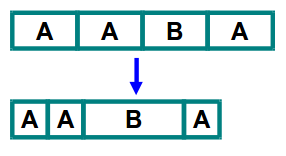

In [108]:
from IPython.display import Image
Image("/home/souvik/Pictures/Selection_006.png")

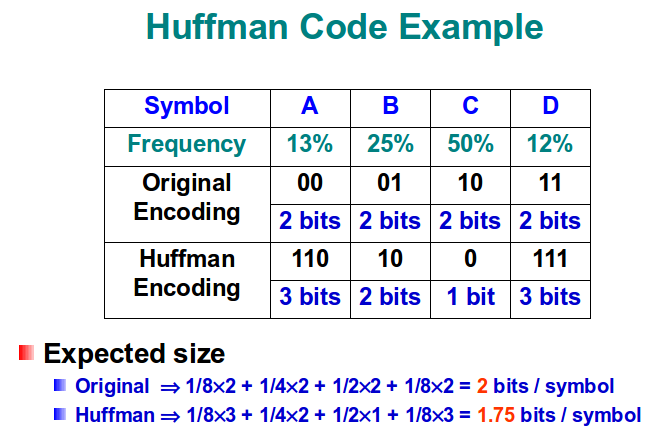

In [109]:
from IPython.display import Image
Image("/home/souvik/Pictures/Selection_007.png")

# Creating a basic structure for huffman tree

This includes a creating a class called node which represents a particulat node of the tree and then defining different methods to represent different operations on the tree.
Trees need to keep track of four things: Which item they store (if any), the combined weight of them and their children, and their left and right child nodes.

* First of all left, right and item itself are initialized to None(for an empty node)
* Init method assigns the item and the weight to the node.
* As the method name itself explains setChildren method assigns the left and right children respecively
* __repr__ method prints out the status of nodes which can be useful for debugging the tree
* __cmp__ method lets us use heapq module to order the nodes.

In [4]:
class Node(object):
    left = None
    right = None
    item = None
    weight = 0
    
    def __init__(self, i, w):
        self.item = i
        self.weight = w
        
    def setChildren(self, ln, rn):
        self.left = ln
        self.right = rn
        
    def __repr__(self):
        return "%s - %s — %s _ %s" % (self.item, self.weight, self.left, self.right)
    
    def __cmp__(self, a):
        return cmp(self.weight, a.weight)


# Data Structures used 

* **Binary tree**- A binary tree is a tree-like structure that has a root and in which each vertex has no more than two children. Each child of a vertex is called a left or right child. This is implemeted using a class and different methods of the class to arrange the tree.


* **Heap Queue**- This is a kind of **priority queue** ( In a priority queue, an element with high priority is served before an element with low priority. If two elements have the same priority, they are served according to their order in the queue) with the property that every parent node has a value less than or equal to any of its children. This implementation uses arrays for which heap[k]≤heap[2∗k+1]heap[k]≤heap[2∗k+1] and heap[k]≤heap[2∗k+2]heap[k]≤heap[2∗k+2] for all kk, counting elements from zero. For the sake of comparison, non-existing elements are considered to be infinite. The interesting property of a heap is that its smallest element is always the root, heap[0]. In this program we modify this property to make the node bigger than both of its children and thus root node has biggest weight.

* **Dictionary**- Key value pair based data sturture which is used to store the character as a key and the huffman code as the value after traversal through the binary tree. Each key is separated from its value by a colon (:), the items are separated by commas, and the whole thing is enclosed in curly braces. An empty dictionary without any items is written with just two curly braces, like this: {}. Keys are unique within a dictionary while values may not be. The values of a dictionary can be of any type, but the keys must be of an immutable data type such as strings, numbers, or tuples.

We need to build the tree: To do this firstly we need to create nodes for each item in the list, then be able to find the nodes with the smallest weights so we can combine them.

We'll use the groupby function of the itertools module to calculate the original weights, then use a heapq priority queue to rank the nodes. In this program, the source string is called input.

In [55]:
from bs4 import BeautifulSoup
import urllib
text_file = open('/home/souvik/nltk_data/corpora/state_union/2006-GWBush.txt','r')
text = text_file.read()
#text_file = open('/home/souvik/nltk_data/corpora/movie_reviews/pos/cv000_29590.txt','r')
#text = text_file.read()
#text = 'aababcabcd'
print text

PRESIDENT GEORGE W. BUSH'S ADDRESS BEFORE A JOINT SESSION OF THE CONGRESS ON THE STATE OF THE UNION
 
January 31, 2006

THE PRESIDENT: Thank you all. Mr. Speaker, Vice President Cheney, members of Congress, members of the Supreme Court and diplomatic corps, distinguished guests, and fellow citizens: Today our nation lost a beloved, graceful, courageous woman who called America to its founding ideals and carried on a noble dream. Tonight we are comforted by the hope of a glad reunion with the husband who was taken so long ago, and we are grateful for the good life of Coretta Scott King. (Applause.)

President George W. Bush reacts to applause during his State of the Union Address at the Capitol, Tuesday, Jan. 31, 2006. White House photo by Eric DraperEvery time I'm invited to this rostrum, I'm humbled by the privilege, and mindful of the history we've seen together. We have gathered under this Capitol dome in moments of national mourning and national achievement. We have served America 

In [56]:
from itertools import groupby
from heapq import *
word_freq_dict = {}
for a,b in groupby(sorted(text)):
    word_freq_dict[a] = len(list(b))

itemqueue =  [Node(a,len(list(b))) for a,b in groupby(sorted(text))]
heapify(itemqueue)
while len(itemqueue) > 1:
    l = heappop(itemqueue)
    r = heappop(itemqueue)
    n = Node(None, r.weight+l.weight)
    n.setChildren(l,r)
    heappush(itemqueue, n)
    
print(word_freq_dict)

{'\n': 141, '!': 1, ' ': 5532, '"': 2, '$': 4, "'": 37, ')': 68, '(': 68, '-': 150, ',': 323, '/': 3, '.': 358, '1': 22, '0': 45, '3': 8, '2': 19, '5': 5, '4': 5, '7': 5, '6': 10, '9': 4, '8': 4, ';': 3, ':': 15, '?': 1, 'A': 196, 'C': 39, 'B': 26, 'E': 41, 'D': 28, 'G': 12, 'F': 14, 'I': 100, 'H': 23, 'K': 10, 'J': 13, 'M': 16, 'L': 15, 'O': 29, 'N': 16, 'Q': 3, 'P': 17, 'S': 68, 'R': 12, 'U': 19, 'T': 71, 'W': 61, 'V': 6, 'Y': 10, 'Z': 2, 'a': 2071, 'c': 870, 'b': 317, 'e': 3333, 'd': 990, 'g': 517, 'f': 585, 'i': 1841, 'h': 1037, 'k': 128, 'j': 25, 'm': 672, 'l': 1083, 'o': 2105, 'n': 1880, 'q': 30, 'p': 646, 's': 1574, 'r': 1823, 'u': 786, 't': 2201, 'w': 465, 'v': 285, 'y': 413, 'x': 30, 'z': 24}


At the end of this step, itemqueue has only one element, the root node of the tree.

Next we need to walk through the tree to work out the encoding for each item. Rather than go through the tree for each character, we'll traverse the whole tree in one go and store the results in a dictionary.

In [57]:
codes = {}

def codeIt(s, node):
    if node.item:
        if not s:
            codes[node.item] = "0"
        else:
            codes[node.item] = s
    else:
        codeIt(s+"0", node.left)
        codeIt(s+"1", node.right)

codeIt("",itemqueue[0])

In [58]:
print(codes, "".join([codes[a] for a in text]))

({'\n': '11000010', '!': '110010111001001', ' ': '111', '"': '11000000001111', '$': '1100000000110', "'": '1100001111', ')': '110000001', '(': '110000011', '-': '11001010', ',': '1100111', '/': '11001011100101', '.': '1101100', '1': '11011010010', '0': '1101101000', '3': '110000111010', '2': '11001011000', '5': '1100101110001', '4': '1100101110011', '7': '1100101110000', '6': '110010111010', '9': '1100000000100', '8': '1100000000101', ';': '11011010110010', ':': '11000000000', '?': '110010111001000', 'A': '11011011', 'C': '1100101101', 'B': '0001110100', 'E': '1100101111', 'D': '0001110101', 'G': '110110101011', 'F': '00011101100', 'I': '00011100', 'H': '11011010011', 'K': '110010111011', 'J': '110110101101', 'M': '11000000011', 'L': '00011101101', 'O': '0001110111', 'N': '11000000010', 'Q': '11011010110011', 'P': '11000011100', 'S': '110000010', 'R': '110110101010', 'U': '11001011001', 'T': '110000110', 'W': '000111101', 'V': '1101101011000', 'Y': '110000111011', 'Z': '11000000001110'

In [59]:
original_length = len(text)*8
print('length of text without huffman encoding is '+ str(original_length))

length of text without huffman encoding is 267288


In [60]:
length_after_coding = len("".join([codes[a] for a in text]))
print('length of text after huffman encoding is '+str(length_after_coding))

length of text after huffman encoding is 149770


In [61]:
from __future__ import division
percent_reduction = ((original_length - length_after_coding) /( original_length)) * 100
print('percentage reduction is ' + str(percent_reduction) + ' %')

percentage reduction is 43.9668073389 %


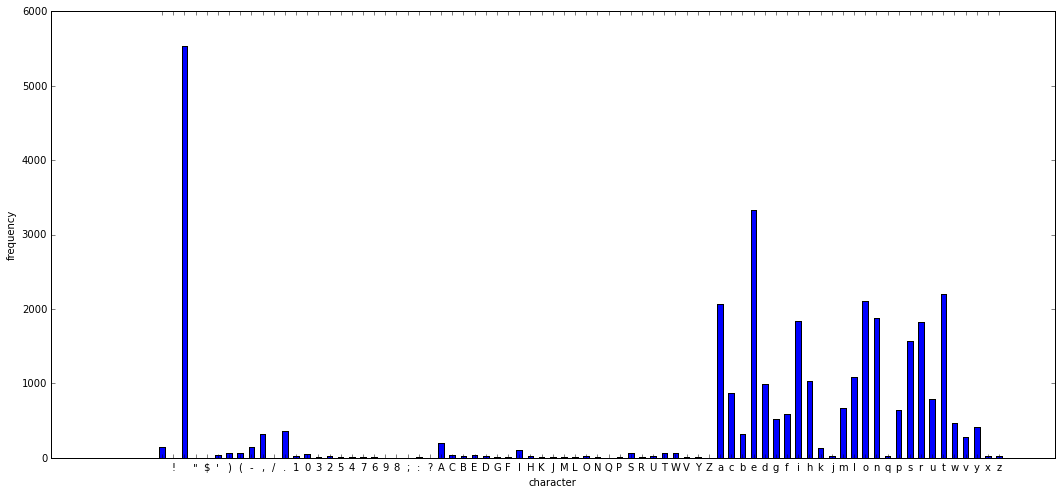

In [62]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
list_1 = word_freq_dict.values()
list_2 = word_freq_dict.keys()
list_3 = np.arange(len(list_1))
width = 18
height = 8
fig = plt.figure(figsize=(width, height))
ax = fig.add_subplot(111)
ax.bar(list_3,list_1,0.5, align='center')
ax.set_xticks(list_3)
ax.set_xticklabels(list_2)
plt.xlabel('character')
plt.ylabel('frequency')
plt.show()